In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets
import  matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris(as_frame = True)

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
df = iris.frame


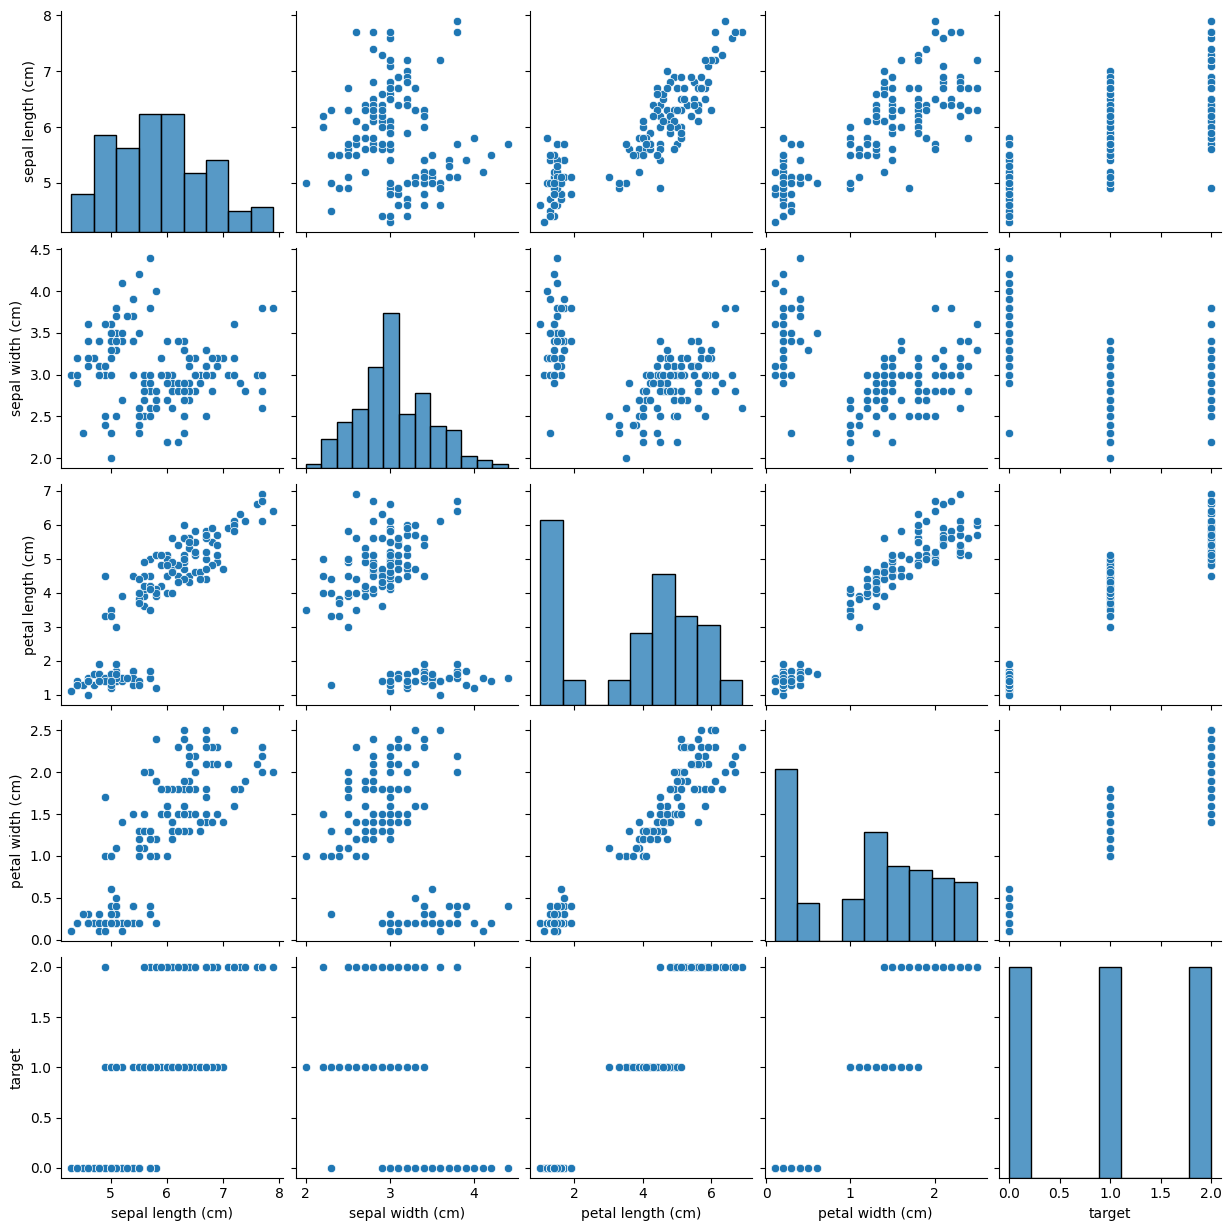

In [6]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 100

sns.pairplot(df)

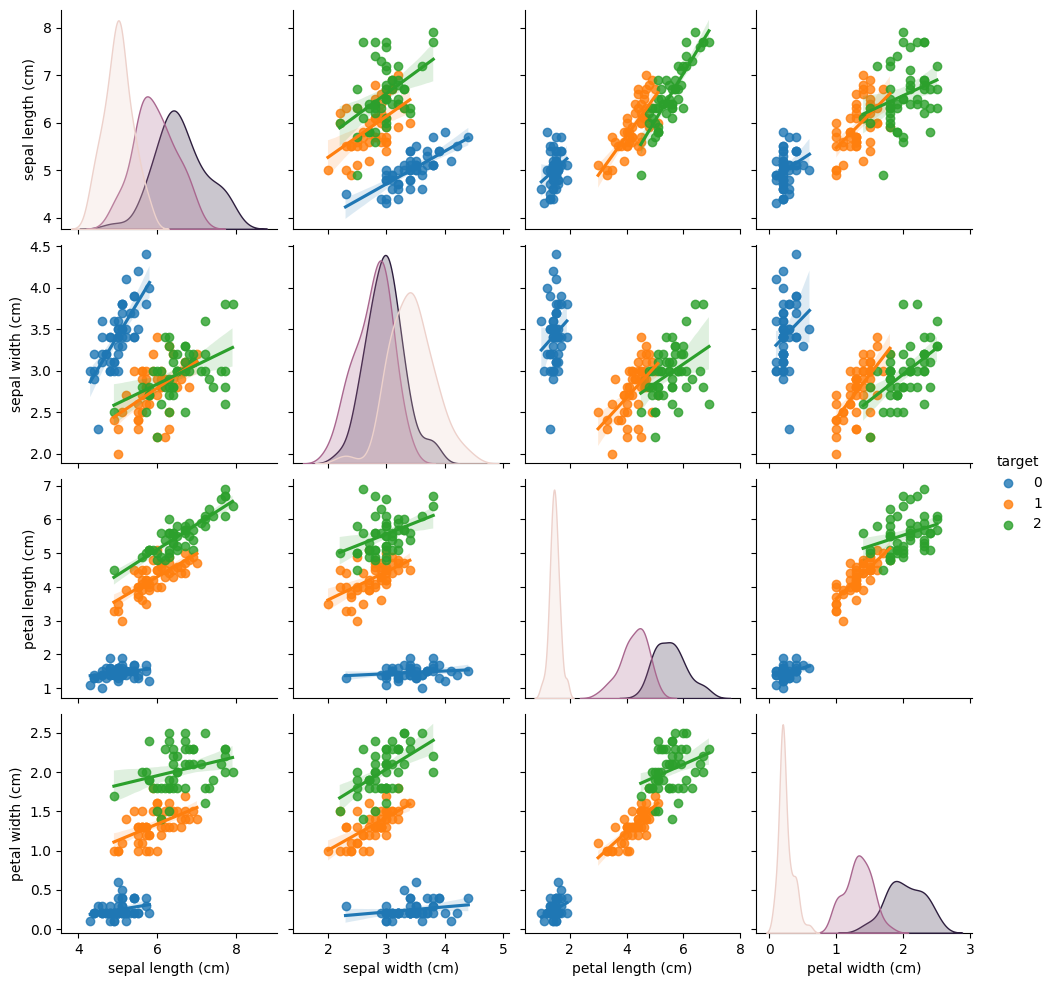

In [7]:
sns.pairplot(df, hue = 'target', kind = 'reg')

In [8]:
df[iris.feature_names]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'],
                test_size = 0.2, random_state = 0)

In [10]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [11]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
pd.DataFrame(X_train)

,0,1,2,3
0,0.613030,0.108501,0.947518,0.736072
1,-0.567766,-0.124001,0.384914,0.347530
2,-0.803926,1.038510,-1.302896,-1.336154
3,0.258791,-0.124001,0.609956,0.736072
4,0.613030,-0.589006,1.003778,1.254129
...,...,...,...,...
115,-1.158164,0.108501,-1.302896,-1.465668
116,0.494950,-0.356503,1.003778,0.736072
117,-0.095448,-0.821508,0.159873,-0.300041
118,2.148065,1.736017,1.622642,1.254129


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



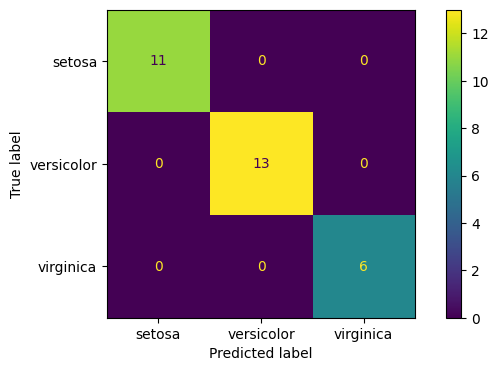

In [16]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm, display_labels = iris.target_names)
disp.plot()

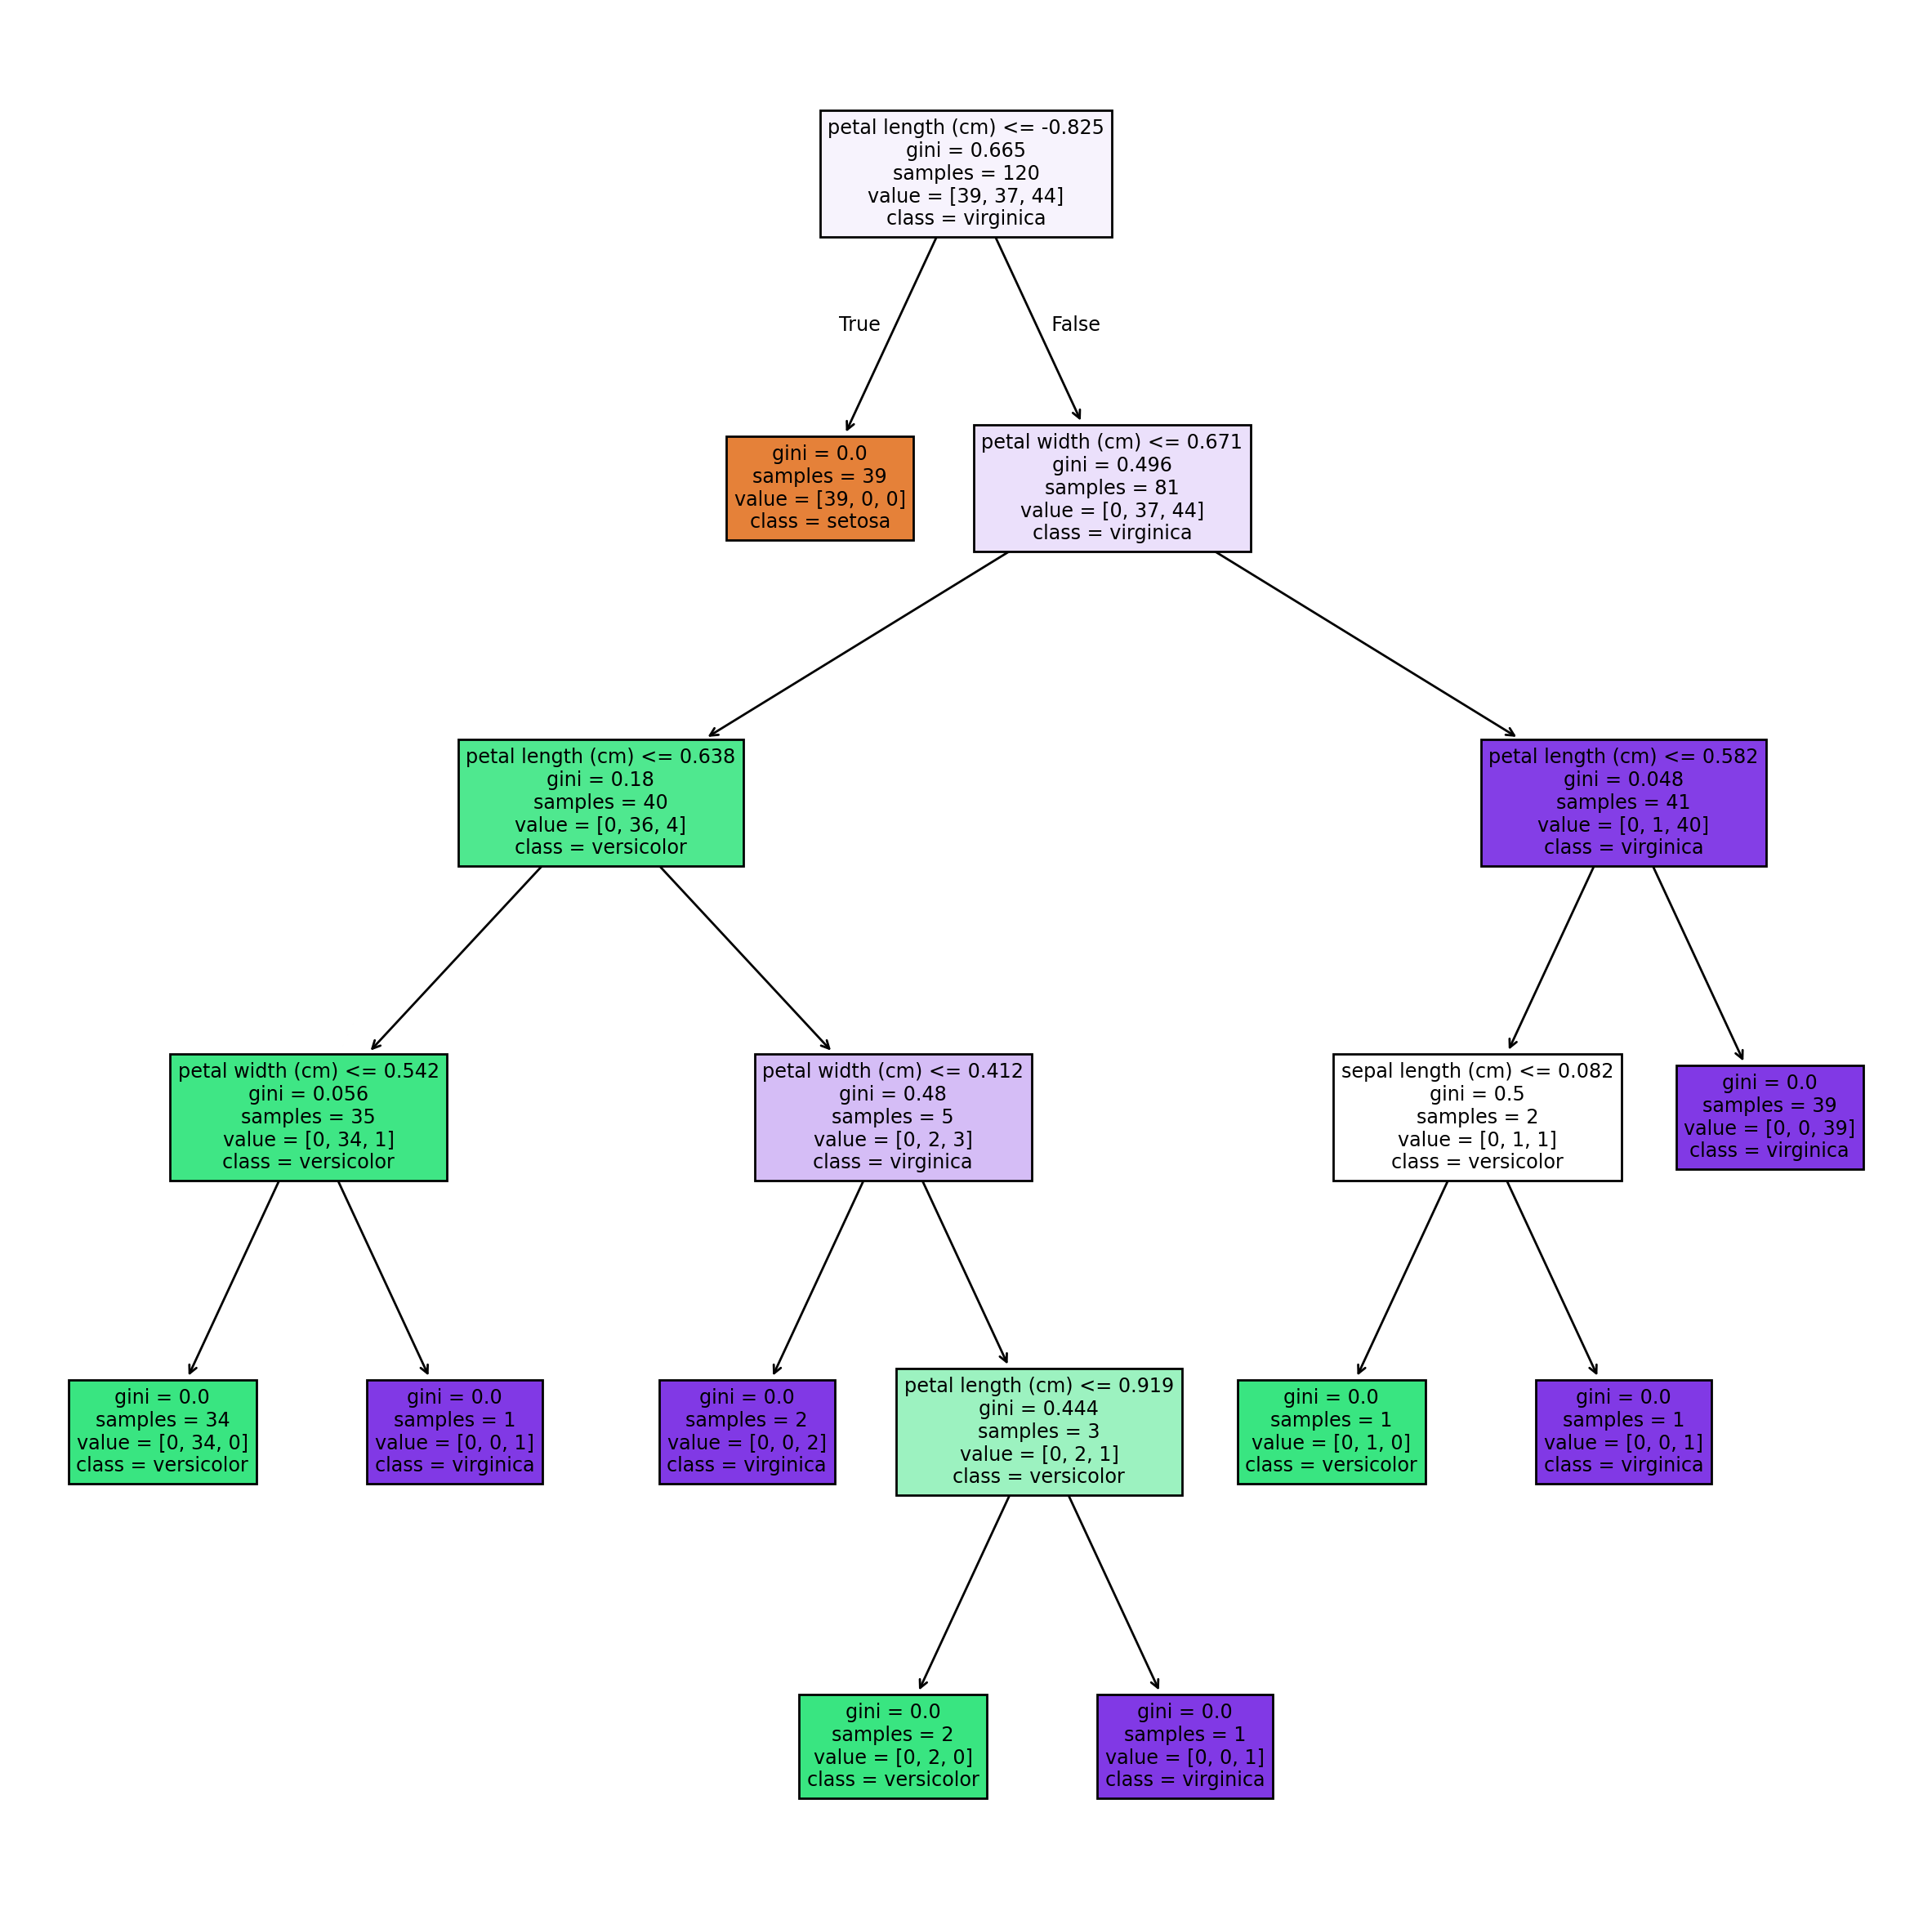

In [17]:
from sklearn import tree

plt.figure(figsize = (15, 15), dpi = 200)
ax = tree.plot_tree(model, feature_names = iris.feature_names,
class_names = iris.target_names, filled = True)

In [18]:
from sklearn.model_selection import GridSearchCV



In [19]:
params = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
'max_depth':[1,2,3,4]}

In [20]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid = params, cv = 5)
grid.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [21]:
grid.best_estimator_, grid.best_score_

(DecisionTreeClassifier(max_depth=2), np.float64(0.9416666666666667))

In [22]:
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [23]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 1.0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], random_state=42, stratify=df['target'])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Train Accuracy: 1.0
Test Accuracy: 0.8947368421052632


In [25]:
from sklearn import datasets

In [26]:
diabetes = datasets.load_diabetes(as_frame = True)

In [27]:
print(diabetes)

{'data':           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017

In [28]:
df = diabetes.frame

In [29]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


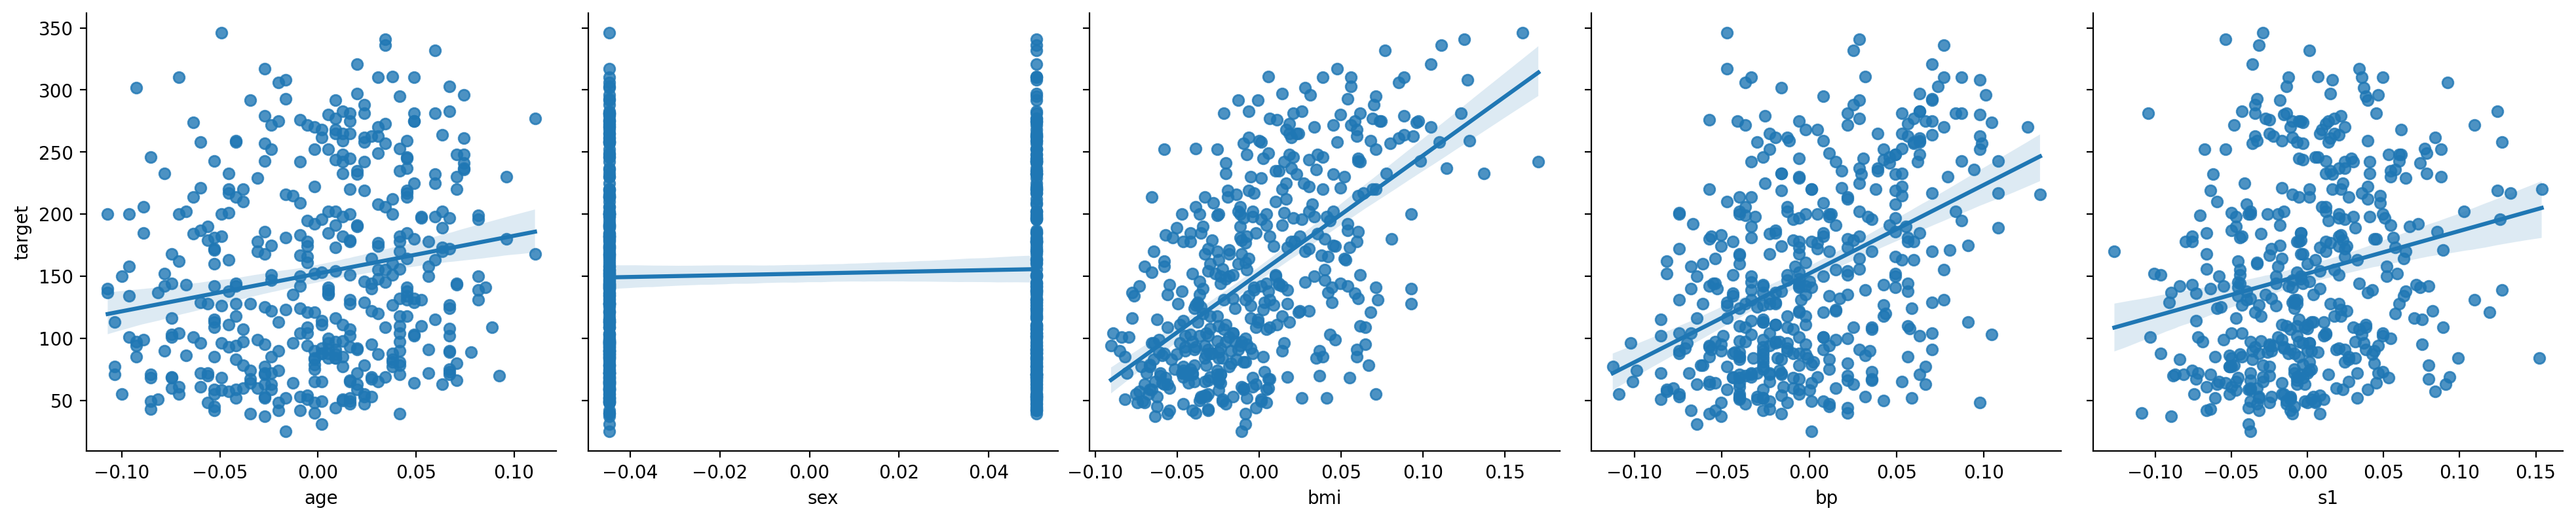

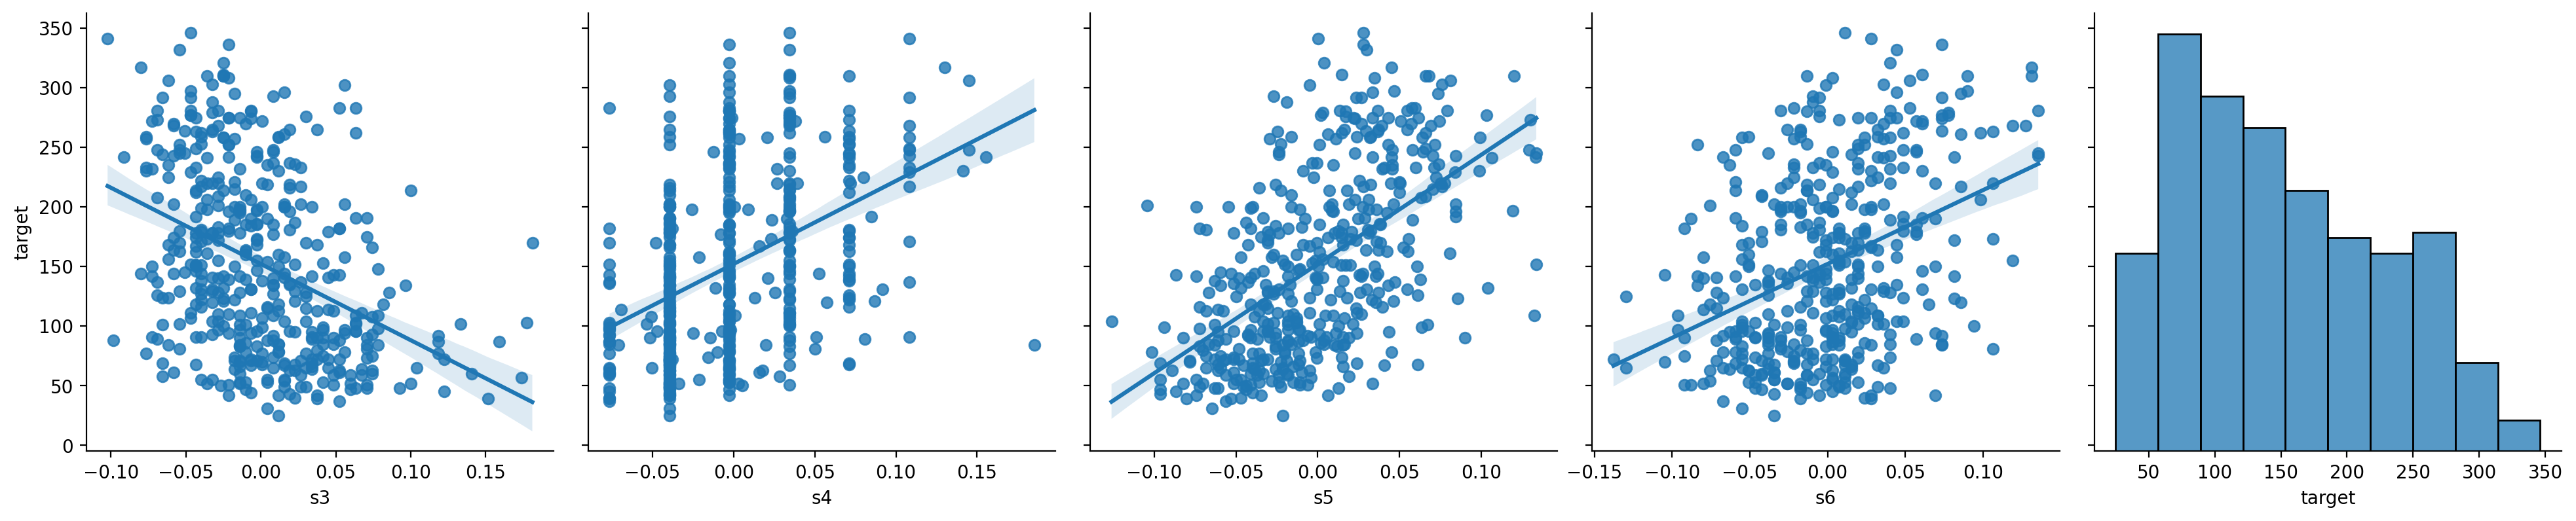

In [30]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 200
sns.pairplot(df, x_vars = df.columns[:5], y_vars = 'target',
    height = 4, aspect = 1, kind = 'reg')

sns.pairplot(df, x_vars = df.columns[-5:], y_vars = 'target',
height = 4, aspect = 1, kind = 'reg')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df[diabetes.feature_names], df['target'], 
        test_size = 0.2, random_state = 0)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).describe()


,0,1,2,3,4,5,6,7,8,9
count,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02
mean,-2.516086e-17,-6.038607e-17,1.006434e-17,1.509652e-17,1.509652e-17,1.509652e-17,2.516086e-17,-3.774129e-17,5.032172e-18,-2.516086e-18
std,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00
min,-2.231571e+00,-9.748211e-01,-1.832471e+00,-2.375019e+00,-2.300645e+00,-2.436674e+00,-2.163283e+00,-1.598664e+00,-2.574942e+00,-2.788322e+00
25%,-8.062641e-01,-9.748211e-01,-7.300779e-01,-7.650898e-01,-7.235278e-01,-6.210169e-01,-6.810191e-01,-8.307241e-01,-6.793412e-01,-6.896489e-01
50%,9.392955e-02,-9.748211e-01,-1.568334e-01,-1.064822e-01,-8.099871e-02,-6.900397e-02,-1.349220e-01,-6.278400e-02,-1.055991e-01,-1.807356e-02
75%,7.690748e-01,1.025829e+00,6.368898e-01,6.984827e-01,5.615304e-01,5.495165e-01,5.672028e-01,7.051561e-01,6.361900e-01,5.695548e-01
max,2.269397e+00,1.025829e+00,3.503112e+00,2.820663e+00,3.277676e+00,4.240687e+00,3.843785e+00,3.846031e+00,2.726822e+00,2.752175e+00


In [39]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_predict)))
print("r2_score: ", r2_score(y_test, y_predict))

RMSE:  89.99144778342719
r2_score:  -0.5792854749495977


In [41]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load dataset (assuming you're using the diabetes dataset)
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df[diabetes.feature_names],
    df['target'],
    test_size=0.2,
    random_state=0
)

# 🔥 No scaling — decision trees don’t need it

# Define model
dt = DecisionTreeRegressor(random_state=0)

# Define parameter grid
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid Search with cross-validation
grid = GridSearchCV(dt, params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Evaluate
y_pred = best_model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Best Parameters: {'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
RMSE: 69.02524903746954
R2 Score: 0.07087503832366682


In [42]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

print(f"Dataset shape: {df.shape}")
print(f"Target statistics: Mean={df['target'].mean():.2f}, Std={df['target'].std():.2f}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df[diabetes.feature_names],
    df['target'],
    test_size=0.2,
    random_state=42  # More common random state
)

# 🔥 IMPROVEMENT 1: Expanded and more refined parameter grid
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 0.9],
    'max_leaf_nodes': [None, 10, 20, 30, 50, 100],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# 🔥 IMPROVEMENT 2: Use RandomSearchCV instead for better efficiency
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeRegressor(random_state=42)

# Use RandomizedSearchCV for better parameter exploration
random_search = RandomizedSearchCV(
    dt, 
    params, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1, 
    n_iter=100,  # Try more combinations
    random_state=42
)
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Evaluate
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== Decision Tree Results ===")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# 🔥 IMPROVEMENT 3: Try ensemble methods (often perform better)
print("\n=== Trying Ensemble Methods ===")

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest CV R2: {rf_scores.mean():.4f} (+/- {rf_scores.std() * 2:.4f})")

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')
print(f"Gradient Boosting CV R2: {gb_scores.mean():.4f} (+/- {gb_scores.std() * 2:.4f})")

# Fit the best ensemble method
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Test R2: {r2_score(y_test, y_pred_rf):.4f}")

# 🔥 IMPROVEMENT 4: Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': diabetes.feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importance ===")
print(feature_importance.head(10))

Dataset shape: (442, 11)
Target statistics: Mean=152.13, Std=77.09
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 100, 'max_features': 0.7, 'max_depth': 2}
Best CV Score: 0.3649586886211621

=== Decision Tree Results ===
RMSE: 61.1187
R2 Score: 0.2949

=== Trying Ensemble Methods ===
Random Forest CV R2: 0.3909 (+/- 0.2976)
Gradient Boosting CV R2: 0.3610 (+/- 0.3658)
Random Forest Test R2: 0.4428

=== Feature Importance ===
  feature  importance
2     bmi    0.355469
8      s5    0.230957
3      bp    0.088408
9      s6    0.071329
0     age    0.058642
5      s2    0.057227
4      s1    0.052784
6      s3    0.051339
7      s4    0.024213
1     sex    0.009633
